<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Entanglement Revisited*_ 

For more information about how to use the IBM Q experience (QX), consult the [tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).

***
### Contributors
Jay Gambetta, Antonio Córcoles

## Beta testing ibmqx3

Running some stuff to check errors in ibmqx3


In [1]:
# Checking the version of PYTHON; we only support 3 at the moment
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")
    
# useful additional packages 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


import sys
sys.path.append("../../")
# importing the QISKit
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# import basic plot tools
from qiskit.basicplotter import plot_histogram
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"])

True

>> quantum_registers created: q 16
>> classical_registers created: c 16
running on backend: ibmqx3
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
status = RUNNING (30 seconds)
status = RUNNING (40 seconds)
status = RUNNING (50 seconds)
status = RUNNING (60 seconds)
status = RUNNING (70 seconds)


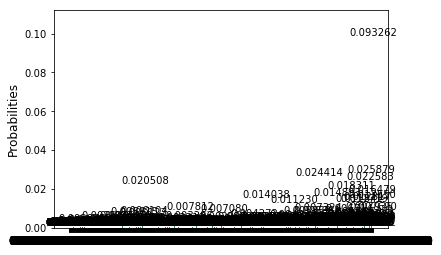

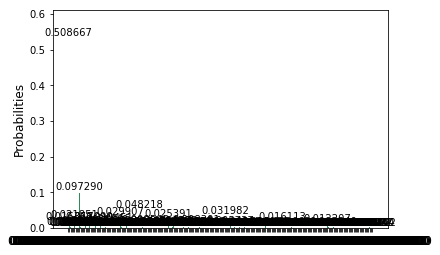

In [32]:
# 3 - qubits 
device = 'ibmqx3'
shots = 8192
# quantum circuit to make GHZ state 
q = Q_program.create_quantum_registers("q", 16)
c = Q_program.create_classical_registers("c", 16)
pi = Q_program.create_circuit("pi", ["q"], ["c"])
pi.x(q)
pi.measure(q[0],c[0])
pi.measure(q[1],c[1])
pi.measure(q[2],c[2])
pi.measure(q[3],c[3])
pi.measure(q[4],c[4])
pi.measure(q[5],c[5])
pi.measure(q[6],c[6])
pi.measure(q[7],c[7])
pi.measure(q[8],c[8])
pi.measure(q[9],c[9])
pi.measure(q[10],c[10])
pi.measure(q[11],c[11])
pi.measure(q[12],c[12])
pi.measure(q[13],c[13])
pi.measure(q[14],c[14])
pi.measure(q[15],c[15])
hache = Q_program.create_circuit("hache", ["q"], ["c"])
hache.h(q)
hache.h(q)
hache.measure(q[0],c[0])
hache.measure(q[1],c[1])
hache.measure(q[2],c[2])
hache.measure(q[3],c[3])
hache.measure(q[4],c[4])
hache.measure(q[5],c[5])
hache.measure(q[6],c[6])
hache.measure(q[7],c[7])
hache.measure(q[8],c[8])
hache.measure(q[9],c[9])
hache.measure(q[10],c[10])
hache.measure(q[11],c[11])
hache.measure(q[12],c[12])
hache.measure(q[13],c[13])
hache.measure(q[14],c[14])
hache.measure(q[15],c[15])

circuits = ["pi", "hache"]
Q_program.get_qasms(circuits)
Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240)
plot_histogram(Q_program.get_counts("pi"))
plot_histogram(Q_program.get_counts("hache"))

In [34]:
Q_program.average_data('pi',{'1111111111111111':1})

0.09326171875

>> quantum_registers created: q 16
>> classical_registers created: c 16
running on backend: ibmqx3
status = RUNNING (10 seconds)
status = RUNNING (20 seconds)
status = RUNNING (30 seconds)
status = RUNNING (40 seconds)
status = RUNNING (50 seconds)
status = RUNNING (60 seconds)


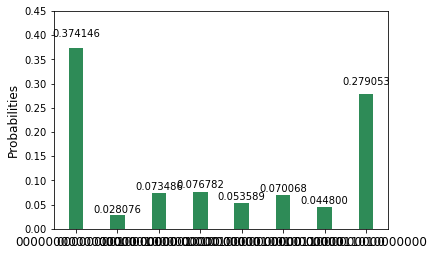

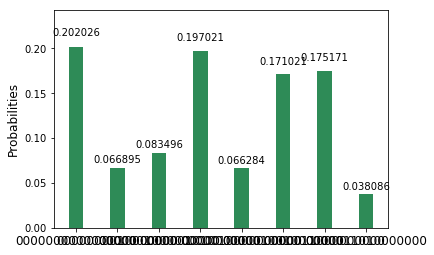

In [42]:
# 3 - qubits 
device = 'ibmqx3'
shots = 8192
# quantum circuit to make GHZ state 
q = Q_program.create_quantum_registers("q", 16)
c = Q_program.create_classical_registers("c", 16)
ghz = Q_program.create_circuit("ghz", ["q"], ["c"])
ghz.h(q[9])
ghz.cx(q[9],q[10])
ghz.h(q[7])
ghz.h(q[10])
ghz.cx(q[7],q[10])
ghz.h(q[7])
ghz.h(q[10])

# quantum circuit to measure q in standard basis 
measureZZZ = Q_program.create_circuit("measureZZZ", ["q"], ["c"])
measureZZZ.measure(q[7], c[7])
measureZZZ.measure(q[9], c[9])
measureZZZ.measure(q[10], c[10])

measureXXX = Q_program.create_circuit("measureXXX", ["q"], ["c"])
measureXXX.h(q[7])
measureXXX.h(q[9])
measureXXX.h(q[10])
measureXXX.measure(q[7], c[7])
measureXXX.measure(q[9], c[9])
measureXXX.measure(q[10], c[10])

Q_program.add_circuit("ghz_measureZZZ", ghz+measureZZZ )
Q_program.add_circuit("ghz_measureXXX", ghz+measureXXX )
circuits = ["ghz_measureZZZ", "ghz_measureXXX"]
Q_program.get_qasms(circuits)
Q_program.execute(circuits, device, shots, max_credits=5, wait=10, timeout=240)
plot_histogram(Q_program.get_counts("ghz_measureZZZ"))
plot_histogram(Q_program.get_counts("ghz_measureXXX"))

In [41]:
Q_program.average_data('ghz_measureZZZ',{'0000001110000000':1})

0.20556640625